<a href="https://colab.research.google.com/github/cyberust/DietSimulation/blob/main/Diet_Simulation_Easing_Days.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

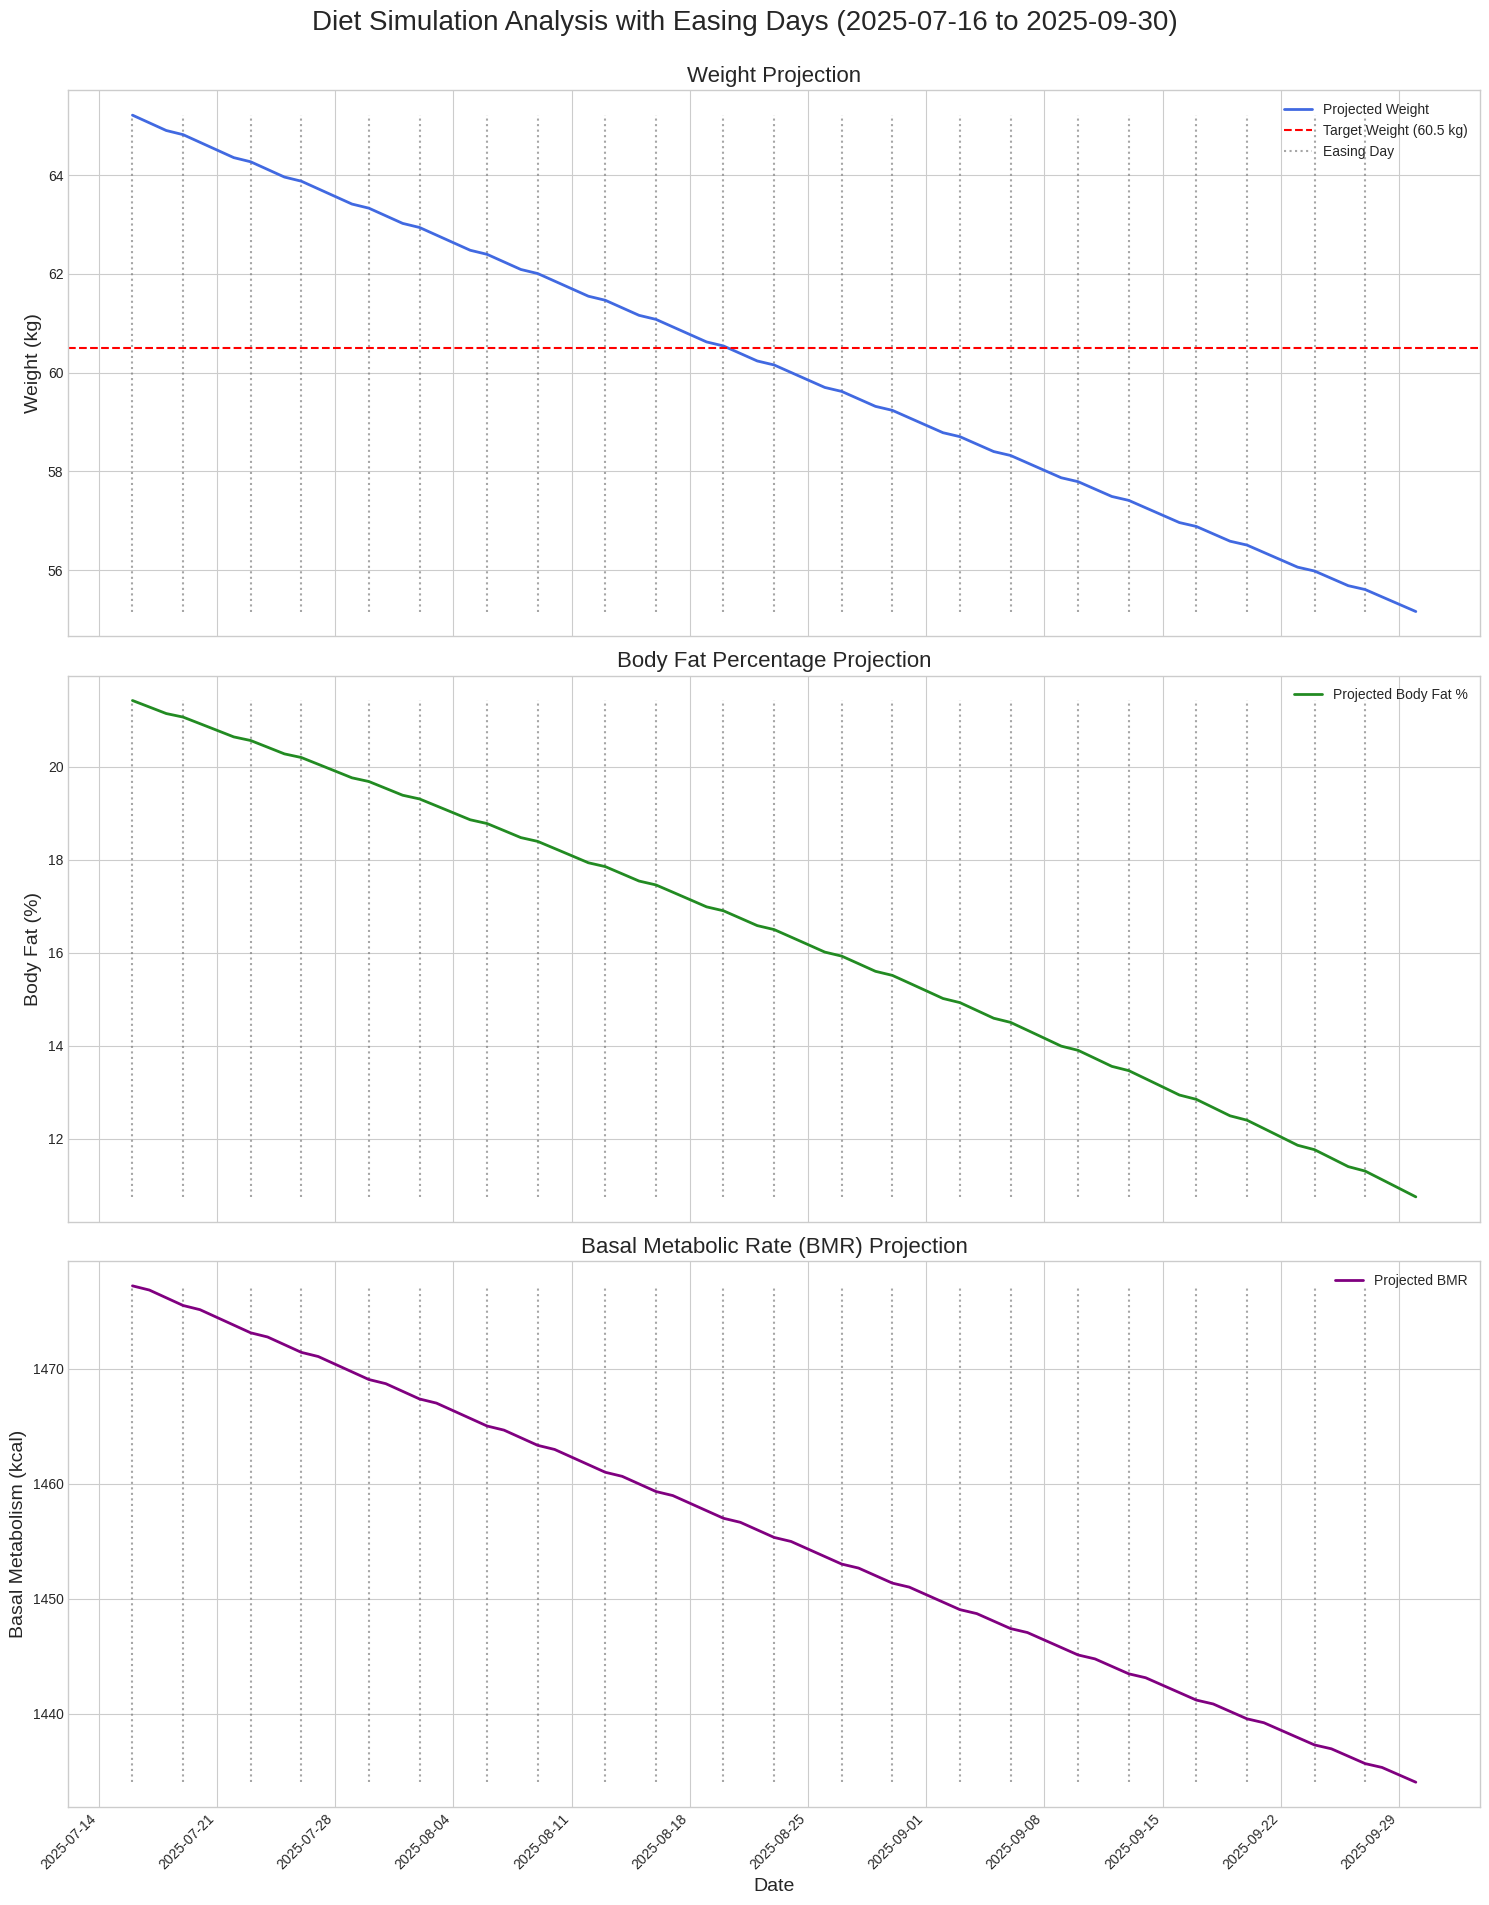

--- Simulation Forecast for Final Day (2025-09-30) ---
Projected Weight: 55.16 kg
Projected Body Fat %: 10.75 %
Projected BMR: 1434 kcal


In [1]:
# ==============================================================================
# Step 1: Library Imports
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date

# ==============================================================================
# Step 2: Simulation Configuration
# ==============================================================================
# --- Simulation Period ---
start_date = date.today() # The simulation starts from today
end_date = date(2025, 9, 30)
date_range = pd.date_range(start=start_date, end=end_date)
days = len(date_range)

# --- Initial Body State ---
initial_weight_kg = 65.3
initial_fat_percentage = 0.215
initial_lbm = initial_weight_kg * (1 - initial_fat_percentage)
initial_fat_mass = initial_weight_kg * initial_fat_percentage

# --- Targets ---
target_weight_kg = 60.5

# --- VLCD (Very Low-Calorie Diet) Day Parameters ---
vlcd_calorie_intake = 1100

# --- Easing Day (Your "Cheat Day") Parameters ---
easing_day_calorie_intake = 1700
# Define which days of the week are easing days (Monday=0, Tuesday=1, ..., Saturday=5, Sunday=6)
easing_day_weekdays = {2, 5} # Wednesday and Saturday

# --- Metabolic & Caloric Assumptions ---
exercise_calorie_expenditure = (335 * 5 + 100 * 3) / 7
tef_percentage = 0.15 # Kept constant as both diet days are high-protein
neat_percentage = 0.20
fat_loss_ratio = 0.80
lbm_loss_ratio = 0.20
calories_per_kg_fat = 7200

# ==============================================================================
# Step 3: Run Simulation with Easing Day Logic
# ==============================================================================
simulation_data = []
current_weight = initial_weight_kg
current_lbm = initial_lbm
current_fat_mass = initial_fat_mass

for day in date_range:
    # Determine if today is an easing day
    is_easing_day = day.weekday() in easing_day_weekdays

    # Set calorie intake based on the day type
    if is_easing_day:
        current_calorie_intake = easing_day_calorie_intake
    else:
        current_calorie_intake = vlcd_calorie_intake

    # Calculate BMR using the Katch-McArdle formula
    bmr = 370 + (21.6 * current_lbm)

    # Calculate TDEE
    tef = current_calorie_intake * tef_percentage
    neat = bmr * neat_percentage
    tdee = bmr + exercise_calorie_expenditure + tef + neat

    # Calculate calorie deficit for the day
    calorie_deficit = tdee - current_calorie_intake

    # Calculate weight loss
    weight_loss_kg = calorie_deficit / calories_per_kg_fat
    fat_loss_kg = weight_loss_kg * fat_loss_ratio
    lbm_loss_kg = weight_loss_kg * lbm_loss_ratio

    # Update body composition metrics
    current_weight -= weight_loss_kg
    current_fat_mass -= fat_loss_kg
    current_lbm -= lbm_loss_kg
    current_fat_percentage = current_fat_mass / current_weight if current_weight > 0 else 0

    # Record daily data
    simulation_data.append({
        'Date': day,
        'Weight (kg)': current_weight,
        'Fat Percentage (%)': current_fat_percentage * 100,
        'Basal Metabolism (kcal)': bmr,
        'Calorie Intake (kcal)': current_calorie_intake,
        'Is Easing Day': is_easing_day
    })

df_sim = pd.DataFrame(simulation_data)

# ==============================================================================
# Step 4: Visualize Results with Easing Day Markers
# ==============================================================================
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 20), sharex=True)
fig.suptitle(f'Diet Simulation Analysis with Easing Days ({start_date} to {end_date})', fontsize=20, y=0.95)

# Get the dates for all easing days for marking the plots
easing_day_dates = df_sim[df_sim['Is Easing Day']]['Date']

# --- 1. Weight Projection ---
ax1.plot(df_sim['Date'], df_sim['Weight (kg)'], label='Projected Weight', color='royalblue', linewidth=2, zorder=2)
ax1.axhline(y=target_weight_kg, color='red', linestyle='--', label=f'Target Weight ({target_weight_kg} kg)', zorder=2)
# Add vertical lines to mark easing days
ax1.vlines(x=easing_day_dates, ymin=df_sim['Weight (kg)'].min(), ymax=df_sim['Weight (kg)'].max(),
           color='gray', linestyle=':', alpha=0.7, label='Easing Day', zorder=1)
ax1.set_ylabel('Weight (kg)', fontsize=14)
ax1.set_title('Weight Projection', fontsize=16)
ax1.legend()

# --- 2. Body Fat Percentage Projection ---
ax2.plot(df_sim['Date'], df_sim['Fat Percentage (%)'], label='Projected Body Fat %', color='forestgreen', linewidth=2, zorder=2)
# Add vertical lines to mark easing days
ax2.vlines(x=easing_day_dates, ymin=df_sim['Fat Percentage (%)'].min(), ymax=df_sim['Fat Percentage (%)'].max(),
           color='gray', linestyle=':', alpha=0.7, zorder=1)
ax2.set_ylabel('Body Fat (%)', fontsize=14)
ax2.set_title('Body Fat Percentage Projection', fontsize=16)
ax2.legend()

# --- 3. Basal Metabolism Projection ---
ax3.plot(df_sim['Date'], df_sim['Basal Metabolism (kcal)'], label='Projected BMR', color='purple', linewidth=2, zorder=2)
# Add vertical lines to mark easing days
ax3.vlines(x=easing_day_dates, ymin=df_sim['Basal Metabolism (kcal)'].min(), ymax=df_sim['Basal Metabolism (kcal)'].max(),
           color='gray', linestyle=':', alpha=0.7, zorder=1)
ax3.set_ylabel('Basal Metabolism (kcal)', fontsize=14)
ax3.set_title('Basal Metabolic Rate (BMR) Projection', fontsize=16)
ax3.legend()

# --- Common X-axis formatting ---
ax3.set_xlabel('Date', fontsize=14)
ax3.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO)) # Mark every Monday
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, ha='right')
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

# ==============================================================================
# Step 5: Display Final Day's Forecast
# ==============================================================================
final_day_result = df_sim.iloc[-1]
print(f"--- Simulation Forecast for Final Day ({end_date.strftime('%Y-%m-%d')}) ---")
print(f"Projected Weight: {final_day_result['Weight (kg)']:.2f} kg")
print(f"Projected Body Fat %: {final_day_result['Fat Percentage (%)']:.2f} %")
print(f"Projected BMR: {final_day_result['Basal Metabolism (kcal)']:.0f} kcal")